In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./train_u6lujuX_CVtuZ9i.txt')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [5]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [6]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [9]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
data['Credit_History'] = data['Credit_History'].fillna('1')
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Gender'] = data['Gender'].fillna('1')
data['Dependents'] = data['Dependents'].str.rstrip('+')
data['Dependents'] = data['Dependents'].fillna( data['Dependents'].dropna().mode().values[0]).astype(np.int)
data['LoanAmount'] = data['LoanAmount'].fillna( data['LoanAmount'].dropna().mode().values[0])
data['Self_Employed'] = data['Self_Employed'].fillna( data['Self_Employed'].dropna().mode().values[0])
data['Married'] = data['Married'].fillna('Yes')


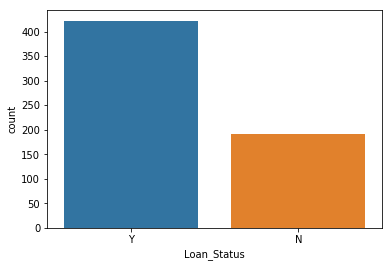

In [16]:
sns.countplot(data['Loan_Status'])

In [17]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


In [19]:
gender = {'Male':'1',
         'Female':'0'
}
married = {'Yes':'1',
          'No':'0'}
education = {'Graduate':'1',
            'Not Graduate':'0'}
employed = {'No':'0',
           'Yes':'1'}
property = {'Rural':'0',
           'Urban':'2',
           'Semiurban':'1'}

In [20]:
data['Gender'] = data['Gender'].replace(gender)
data['Married'] = data['Married'].replace(married)
data['Education'] = data['Education'].replace(education)
data['Self_Employed'] = data['Self_Employed'].replace(employed)
data['Property_Area'] = data['Property_Area'].replace(property)
status = {'N':'0',
         'Y':'1'}
data['Loan_Status'] = data['Loan_Status'].replace(status)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1,2,1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
X = data.drop(columns = ['Loan_ID','Loan_Status'])
y = data['Loan_Status']

In [23]:
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
rfc.fit(X,y)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
dtc.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
test = pd.read_csv('./test_Y3wMUE5_7gLdaTN.txt')

In [28]:
test.Loan_ID.nunique()

367

In [29]:
test['Married'] = test['Married'].replace(married)
test['Education'] = test['Education'].replace(education)
test['Self_Employed'] = test['Self_Employed'].replace(employed)
test['Property_Area'] = test['Property_Area'].replace(property)
#test['Loan_Status'] = test['Loan_Status'].replace(status)
#test['Dependents'] = test['Dependents'].replace(dependent)

In [30]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [31]:
test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [32]:
test['Credit_History'] = test['Credit_History'].fillna('1')


In [33]:
test.Loan_Amount_Term = test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mean())

In [34]:
test['Gender'] = test['Gender'].replace(gender)


In [35]:
test['Gender'] = test['Gender'].fillna('1')


In [36]:
test['Dependents'] = test['Dependents'].str.rstrip('+')
test['Dependents'] = test['Dependents'].fillna( test['Dependents'].dropna().mode().values[0]).astype(np.int)


In [37]:
test['LoanAmount'] = test['LoanAmount'].fillna( test['LoanAmount'].dropna().mode().values[0])


In [38]:
test['Self_Employed'] = test['Self_Employed'].fillna( test['Self_Employed'].dropna().mode().values[0])


In [39]:
X_test = test.iloc[:,1:]
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1,2
1,1,1,1,1,0,3076,1500,126.0,360.0,1,2
2,1,1,2,1,0,5000,1800,208.0,360.0,1,2
3,1,1,2,1,0,2340,2546,100.0,360.0,1,2
4,1,0,0,0,0,3276,0,78.0,360.0,1,2
5,1,1,0,0,1,2165,3422,152.0,360.0,1,2
6,0,0,1,0,0,2226,0,59.0,360.0,1,1
7,1,1,2,0,0,3881,0,147.0,360.0,0,0
8,1,1,2,1,0,13633,0,280.0,240.0,1,2
9,1,0,0,0,0,2400,2400,123.0,360.0,1,1


In [40]:
prediction_test_rfc = rfc.predict(X_test)
prediction_test_dtc = dtc.predict(X_test)

In [41]:
test['Loan_Status'] = prediction_test_rfc
final = test.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'], axis=1)
final['Loan_Status'] = final['Loan_Status']
final.to_csv('submission_rfc.csv', index=False)

In [42]:
test['Loan_Status'] = prediction_test_dtc
final = test.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'], axis=1)
final['Loan_Status'] = final['Loan_Status']
final.to_csv('submission_dtc.csv', index=False)